In [46]:
import numpy as np

class StochasticGradientDescent:

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
        
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = y.reshape(-1)
        
        # Gradient descent
        for i in range(self.n_iterations):
            for i in range(X.shape[0]):
                
                # Calculate predictions
                y_predicted = np.dot(X[i], self.weights) + self.bias
                
                # Compute gradients
                dw = 2 * X[i] * (y_predicted - y[i])
                db = 2 * (y_predicted - y[i])
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                # Compute and store loss
                loss = np.mean((y_predicted - y[i]) ** 2)
                self.history['loss'].append(loss)
                self.history['weights'].append(self.weights.copy())
                self.history['bias'].append(self.bias)
                
                # Print progress every 100 iterations
                if (i + 1) % 100 == 0:
                    print(f'Iteration {i + 1}/{self.n_iterations}, Loss: {loss:.4f}')
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [51]:
np.random.seed(42)
X = np.random.rand(200, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(200)

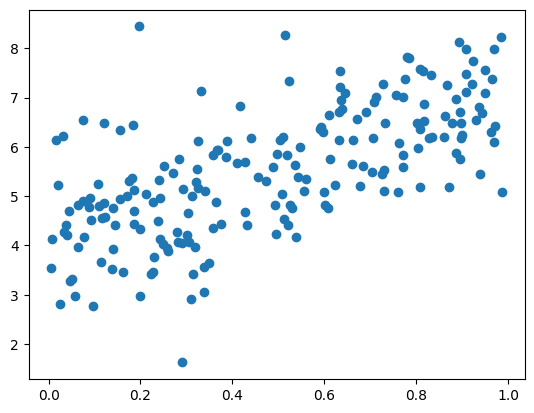

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

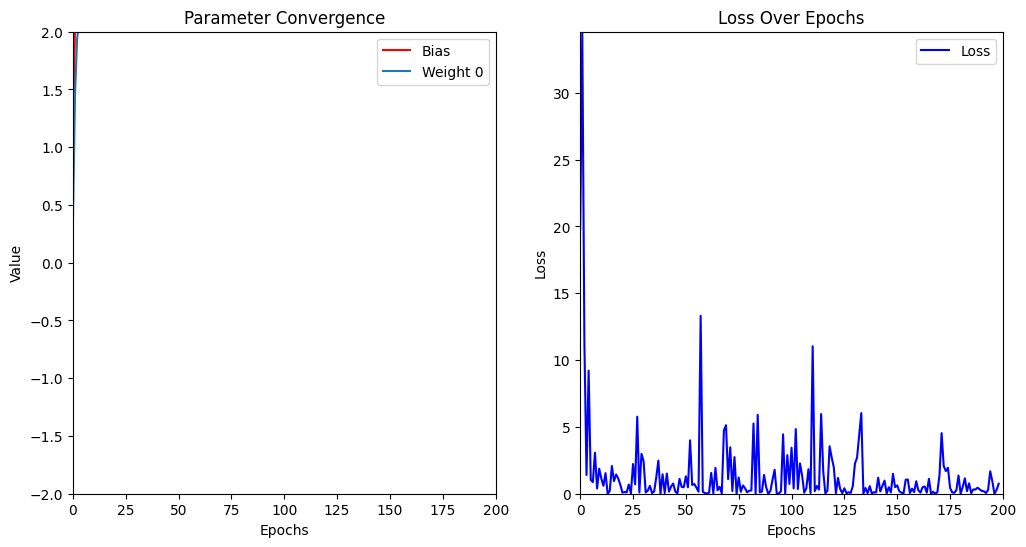

In [53]:
# Create and fit the model
model = StochasticGradientDescent(learning_rate=0.1, n_iterations=200)
model.fit(X, y)

# Animation Setup
history = model.history
epochs = model.n_iterations

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
intercept_line, = ax[0].plot([], [], 'r-', label="Bias")
coef_lines = [ax[0].plot([], [], label=f"Weight {i}")[0] for i in range(X.shape[1])]
loss_line, = ax[1].plot([], [], 'b-', label="Loss")

# Set up axes
ax[0].set_xlim(0, epochs)
ax[0].set_ylim(-2, 2)
ax[0].set_title("Parameter Convergence")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Value")
ax[0].legend()

ax[1].set_xlim(0, epochs)
ax[1].set_ylim(0, max(history["loss"]))
ax[1].set_title("Loss Over Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

def update(frame):
    # Update bias
    intercept_line.set_data(range(frame), history["bias"][:frame])
    
    # Update weights
    for i, coef_line in enumerate(coef_lines):
        coef_line.set_data(range(frame), [history["weights"][j][i] for j in range(frame)])
    
    # Update loss
    loss_line.set_data(range(frame), history["loss"][:frame])
    return [intercept_line] + coef_lines + [loss_line]

ani = FuncAnimation(fig, update, frames=epochs, interval=100, blit=False)

# Save the animation
ani.save("sgd_animation.gif", writer="pillow", fps=10)
plt.show()